In [417]:
# 处理时间序列类型
from datetime import datetime
from datetime import timedelta # 表示两个时间的差
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

In [418]:
now = datetime.now()

In [419]:
now

datetime.datetime(2022, 3, 25, 14, 48, 47, 632161)

In [420]:
now.year, now.month, now.day # 创建年月日元组

(2022, 3, 25)

In [421]:
delta = datetime(2011, 1, 7) - datetime(2008, 6, 24, 8, 15)

In [422]:
delta

datetime.timedelta(days=926, seconds=56700)

In [423]:
start = datetime(2011, 1, 7)

In [424]:
start

datetime.datetime(2011, 1, 7, 0, 0)

In [425]:
start + timedelta(seconds=12) # 添加12个间隔 days

datetime.datetime(2011, 1, 7, 0, 0, 12)

In [426]:
timedelta?

In [427]:
start - 2 * timedelta(12)

datetime.datetime(2010, 12, 14, 0, 0)

In [428]:
stamp = datetime(2011, 1, 3)

In [429]:
stamp

datetime.datetime(2011, 1, 3, 0, 0)

In [430]:
stamp.strftime('%Y-%m-%d-%H-%M-%S%F')

'2011-01-03-00-00-002011-01-03'

In [431]:
365 / 7

52.142857142857146

In [432]:
value = '2011-01-03'

In [433]:
value

'2011-01-03'

In [434]:
datetime.strptime(value, "%Y-%m-%d") # 为什么不能传入%F

datetime.datetime(2011, 1, 3, 0, 0)

In [435]:
datestrs = ['7/6/2011', '8/6/2011']

In [436]:
[datetime.strptime(x, '%m/%d/%Y') for x in datestrs]

[datetime.datetime(2011, 7, 6, 0, 0), datetime.datetime(2011, 8, 6, 0, 0)]

In [437]:
from dateutil.parser import parse

In [438]:
parse('2002-1-12')

datetime.datetime(2002, 1, 12, 0, 0)

In [439]:
parse('Jan 31, 1997 10:45 PM')

datetime.datetime(1997, 1, 31, 22, 45)

In [440]:
parse('6/12/2022', dayfirst=True)

datetime.datetime(2022, 12, 6, 0, 0)

In [441]:
datestrs = ['7/6/2011', '8/6/2011']

In [442]:
pd.to_datetime(datestrs)

DatetimeIndex(['2011-07-06', '2011-08-06'], dtype='datetime64[ns]', freq=None)

In [443]:
idx = pd.to_datetime(datestrs + [None])

In [444]:
idx[2]

NaT

In [445]:
pd.isnull(idx)

array([False, False,  True])

In [446]:
idx

DatetimeIndex(['2011-07-06', '2011-08-06', 'NaT'], dtype='datetime64[ns]', freq=None)

In [447]:
[item.strftime('%x') for item in idx.dropna()]

['07/06/11', '08/06/11']

In [448]:
dates = ['2001-1-2', '2011-1-5', '2011-1-7', '2011-1-8', '2011-1-9']

In [449]:
length = len(dates)

In [450]:
ts = pd.Series(np.random.randn(length), index=dates) # 直接用str生成索引

In [451]:
ts

2001-1-2   -2.339106
2011-1-5    0.336486
2011-1-7    0.480741
2011-1-8   -0.824572
2011-1-9    0.592761
dtype: float64

In [452]:
ts.index

Index(['2001-1-2', '2011-1-5', '2011-1-7', '2011-1-8', '2011-1-9'], dtype='object')

In [453]:
dates = list(map(parse, dates))

In [454]:
dates

[datetime.datetime(2001, 1, 2, 0, 0),
 datetime.datetime(2011, 1, 5, 0, 0),
 datetime.datetime(2011, 1, 7, 0, 0),
 datetime.datetime(2011, 1, 8, 0, 0),
 datetime.datetime(2011, 1, 9, 0, 0)]

In [455]:
ts = pd.Series(np.random.randn(length), index=dates) # 利用datetime对象生成index

In [456]:
ts

2001-01-02    0.026222
2011-01-05   -0.298681
2011-01-07   -0.742748
2011-01-08    0.415004
2011-01-09   -0.634284
dtype: float64

In [457]:
ts.index

DatetimeIndex(['2001-01-02', '2011-01-05', '2011-01-07', '2011-01-08',
               '2011-01-09'],
              dtype='datetime64[ns]', freq=None)

In [458]:
ts.index[0]

Timestamp('2001-01-02 00:00:00')

In [459]:
ts + ts[::2]

2001-01-02    0.052443
2011-01-05         NaN
2011-01-07   -1.485495
2011-01-08         NaN
2011-01-09   -1.268569
dtype: float64

In [460]:
ts[::2]

2001-01-02    0.026222
2011-01-07   -0.742748
2011-01-09   -0.634284
dtype: float64

In [461]:
ts.index.dtype

dtype('<M8[ns]')

In [462]:
stamp = ts.index[0]

In [463]:
stamp

Timestamp('2001-01-02 00:00:00')

In [464]:
ts[stamp]

0.026221642585764652

In [465]:
ts['1/9/2011'] # 可以传入字符串

-0.6342842928838427

In [466]:
ts['2011-1-9']

-0.6342842928838427

In [467]:
ts['20110109']

-0.6342842928838427

In [468]:
longer_ts = pd.Series(np.random.randn(1000),
                     index=pd.date_range('1/1/2000', periods=1000))

In [469]:
longer_ts

2000-01-01   -0.085921
2000-01-02   -0.252199
2000-01-03    0.254667
2000-01-04   -0.384802
2000-01-05   -0.034181
                ...   
2002-09-22   -0.213910
2002-09-23   -0.446784
2002-09-24    0.260135
2002-09-25   -1.529848
2002-09-26    1.829322
Freq: D, Length: 1000, dtype: float64

In [470]:
longer_ts['2000-01']

2000-01-01   -0.085921
2000-01-02   -0.252199
2000-01-03    0.254667
2000-01-04   -0.384802
2000-01-05   -0.034181
2000-01-06   -1.274979
2000-01-07    2.219051
2000-01-08    0.219170
2000-01-09    1.126020
2000-01-10   -0.333853
2000-01-11    1.614110
2000-01-12   -0.044833
2000-01-13   -1.419059
2000-01-14   -0.481901
2000-01-15    0.651236
2000-01-16   -0.663967
2000-01-17   -0.760575
2000-01-18   -0.085874
2000-01-19   -0.867828
2000-01-20    1.689325
2000-01-21    2.093732
2000-01-22   -1.535124
2000-01-23    1.333096
2000-01-24   -1.049463
2000-01-25   -0.016907
2000-01-26    0.934098
2000-01-27    0.337266
2000-01-28    0.996175
2000-01-29    0.438636
2000-01-30    0.029511
2000-01-31   -0.090678
Freq: D, dtype: float64

In [471]:
longer_ts['2000-05-01']

-0.04364916890879455

In [472]:
ts[datetime(2011, 1, 7):]

2011-01-07   -0.742748
2011-01-08    0.415004
2011-01-09   -0.634284
dtype: float64

In [473]:
longer_ts.rename(index={datetime(2000, 1, 1): datetime(2000, 11, 28)}, inplace=True)

In [474]:
longer_ts['2000-11']

2000-11-28   -0.085921
2000-11-01   -0.358580
2000-11-02   -0.810687
2000-11-03   -0.110341
2000-11-04   -1.578829
2000-11-05   -0.959362
2000-11-06    0.799610
2000-11-07    1.272507
2000-11-08   -2.582143
2000-11-09   -0.888821
2000-11-10    0.422102
2000-11-11    1.719511
2000-11-12    0.357575
2000-11-13   -0.645702
2000-11-14   -0.054557
2000-11-15   -0.368118
2000-11-16   -0.090841
2000-11-17   -1.565108
2000-11-18   -0.628493
2000-11-19    0.713150
2000-11-20   -0.650559
2000-11-21   -0.863579
2000-11-22   -0.754230
2000-11-23    0.673410
2000-11-24    0.568168
2000-11-25    1.588352
2000-11-26   -0.727075
2000-11-27   -0.730036
2000-11-28    0.332317
2000-11-29    1.544249
2000-11-30   -0.272757
dtype: float64

In [475]:
longer_ts.sort_index(inplace=True)

In [476]:
longer_ts

2000-01-02   -0.252199
2000-01-03    0.254667
2000-01-04   -0.384802
2000-01-05   -0.034181
2000-01-06   -1.274979
                ...   
2002-09-22   -0.213910
2002-09-23   -0.446784
2002-09-24    0.260135
2002-09-25   -1.529848
2002-09-26    1.829322
Length: 1000, dtype: float64

In [477]:
ts['1/6/2011': '1/11/2011'] # 提供范围索引

2011-01-07   -0.742748
2011-01-08    0.415004
2011-01-09   -0.634284
dtype: float64

In [478]:
ts.truncate()

2001-01-02    0.026222
2011-01-05   -0.298681
2011-01-07   -0.742748
2011-01-08    0.415004
2011-01-09   -0.634284
dtype: float64

In [479]:
dates = pd.date_range('1/1/2000', periods=100, freq='W-WED')

In [480]:
dates

DatetimeIndex(['2000-01-05', '2000-01-12', '2000-01-19', '2000-01-26',
               '2000-02-02', '2000-02-09', '2000-02-16', '2000-02-23',
               '2000-03-01', '2000-03-08', '2000-03-15', '2000-03-22',
               '2000-03-29', '2000-04-05', '2000-04-12', '2000-04-19',
               '2000-04-26', '2000-05-03', '2000-05-10', '2000-05-17',
               '2000-05-24', '2000-05-31', '2000-06-07', '2000-06-14',
               '2000-06-21', '2000-06-28', '2000-07-05', '2000-07-12',
               '2000-07-19', '2000-07-26', '2000-08-02', '2000-08-09',
               '2000-08-16', '2000-08-23', '2000-08-30', '2000-09-06',
               '2000-09-13', '2000-09-20', '2000-09-27', '2000-10-04',
               '2000-10-11', '2000-10-18', '2000-10-25', '2000-11-01',
               '2000-11-08', '2000-11-15', '2000-11-22', '2000-11-29',
               '2000-12-06', '2000-12-13', '2000-12-20', '2000-12-27',
               '2001-01-03', '2001-01-10', '2001-01-17', '2001-01-24',
      

In [481]:
long_df = pd.DataFrame(np.random.randn(100, 4),
                      index=dates,
                      columns=['Colorado', 'Texas',
                              'New York', 'Ohio']) # 使用DatetimeIndex作为index

In [482]:
long_df.truncate('2000-1-25', '2001-1-3')

,Colorado,Texas,New York,Ohio
2000-01-26,-0.271387,0.928776,0.554903,1.459098
2000-02-02,-0.573899,-0.986972,1.789574,0.488050
2000-02-09,-0.461666,-1.029339,-1.034419,-1.519995
2000-02-16,0.607623,0.271955,0.326791,0.662147
2000-02-23,0.075010,-0.673858,-0.932651,1.760175
2000-03-01,0.356195,-0.414808,0.321321,0.458839
2000-03-08,1.642674,0.064072,-0.351758,0.180036
2000-03-15,-0.007838,-0.127529,0.533082,1.240065
2000-03-22,-1.466617,-0.257195,2.362501,0.301956
2000-03-29,-1.647022,-2.671820,0.642316,-0.171572


In [483]:
long_df.loc['5-2001']

,Colorado,Texas,New York,Ohio
2001-05-02,-0.055151,0.012538,0.040637,1.123657
2001-05-09,0.486312,0.312363,-0.239192,0.436329
2001-05-16,-0.506337,1.201541,-0.128575,-1.472527
2001-05-23,-0.538274,1.256275,0.884859,0.426985
2001-05-30,-1.621941,1.014067,-0.058705,-0.264519


In [484]:
dates = pd.DatetimeIndex(['1/1/2000', '1/2/2000', '1/2/2000',
                         '1/2/2000', '1/3/2000'])

In [485]:
dates

DatetimeIndex(['2000-01-01', '2000-01-02', '2000-01-02', '2000-01-02',
               '2000-01-03'],
              dtype='datetime64[ns]', freq=None)

In [486]:
dup_ts = pd.Series(np.arange(5), index=dates)

In [487]:
dup_ts

2000-01-01    0
2000-01-02    1
2000-01-02    2
2000-01-02    3
2000-01-03    4
dtype: int32

In [488]:
dup_ts.index

DatetimeIndex(['2000-01-01', '2000-01-02', '2000-01-02', '2000-01-02',
               '2000-01-03'],
              dtype='datetime64[ns]', freq=None)

In [489]:
dup_ts.index.is_unique

False

In [490]:
dup_ts['1/3/2000']

4

In [491]:
dup_ts['1/2/2000'] # 月日年

2000-01-02    1
2000-01-02    2
2000-01-02    3
dtype: int32

In [492]:
dup_ts.groupby(level=0).size()

2000-01-01    1
2000-01-02    3
2000-01-03    1
dtype: int64

In [493]:
grouped = dup_ts.groupby(level=0)

In [494]:
grouped.mean()

2000-01-01    0.0
2000-01-02    2.0
2000-01-03    4.0
dtype: float64

In [495]:
grouped.count()

2000-01-01    1
2000-01-02    3
2000-01-03    1
dtype: int64

In [496]:
ts

2001-01-02    0.026222
2011-01-05   -0.298681
2011-01-07   -0.742748
2011-01-08    0.415004
2011-01-09   -0.634284
dtype: float64

In [497]:
resampler = ts.resample('D')

In [498]:
resampler

In [499]:
for date in resampler:
    print(date)

(Timestamp('2001-01-02 00:00:00', freq='D'), 2001-01-02    0.026222
dtype: float64)
(Timestamp('2001-01-03 00:00:00', freq='D'), Series([], dtype: float64))
(Timestamp('2001-01-04 00:00:00', freq='D'), Series([], dtype: float64))
(Timestamp('2001-01-05 00:00:00', freq='D'), Series([], dtype: float64))
(Timestamp('2001-01-06 00:00:00', freq='D'), Series([], dtype: float64))
(Timestamp('2001-01-07 00:00:00', freq='D'), Series([], dtype: float64))
(Timestamp('2001-01-08 00:00:00', freq='D'), Series([], dtype: float64))
(Timestamp('2001-01-09 00:00:00', freq='D'), Series([], dtype: float64))
(Timestamp('2001-01-10 00:00:00', freq='D'), Series([], dtype: float64))
(Timestamp('2001-01-11 00:00:00', freq='D'), Series([], dtype: float64))
(Timestamp('2001-01-12 00:00:00', freq='D'), Series([], dtype: float64))
(Timestamp('2001-01-13 00:00:00', freq='D'), Series([], dtype: float64))
(Timestamp('2001-01-14 00:00:00', freq='D'), Series([], dtype: float64))
(Timestamp('2001-01-15 00:00:00', freq='

(Timestamp('2003-06-24 00:00:00', freq='D'), Series([], dtype: float64))
(Timestamp('2003-06-25 00:00:00', freq='D'), Series([], dtype: float64))
(Timestamp('2003-06-26 00:00:00', freq='D'), Series([], dtype: float64))
(Timestamp('2003-06-27 00:00:00', freq='D'), Series([], dtype: float64))
(Timestamp('2003-06-28 00:00:00', freq='D'), Series([], dtype: float64))
(Timestamp('2003-06-29 00:00:00', freq='D'), Series([], dtype: float64))
(Timestamp('2003-06-30 00:00:00', freq='D'), Series([], dtype: float64))
(Timestamp('2003-07-01 00:00:00', freq='D'), Series([], dtype: float64))
(Timestamp('2003-07-02 00:00:00', freq='D'), Series([], dtype: float64))
(Timestamp('2003-07-03 00:00:00', freq='D'), Series([], dtype: float64))
(Timestamp('2003-07-04 00:00:00', freq='D'), Series([], dtype: float64))
(Timestamp('2003-07-05 00:00:00', freq='D'), Series([], dtype: float64))
(Timestamp('2003-07-06 00:00:00', freq='D'), Series([], dtype: float64))
(Timestamp('2003-07-07 00:00:00', freq='D'), Series

(Timestamp('2005-08-04 00:00:00', freq='D'), Series([], dtype: float64))
(Timestamp('2005-08-05 00:00:00', freq='D'), Series([], dtype: float64))
(Timestamp('2005-08-06 00:00:00', freq='D'), Series([], dtype: float64))
(Timestamp('2005-08-07 00:00:00', freq='D'), Series([], dtype: float64))
(Timestamp('2005-08-08 00:00:00', freq='D'), Series([], dtype: float64))
(Timestamp('2005-08-09 00:00:00', freq='D'), Series([], dtype: float64))
(Timestamp('2005-08-10 00:00:00', freq='D'), Series([], dtype: float64))
(Timestamp('2005-08-11 00:00:00', freq='D'), Series([], dtype: float64))
(Timestamp('2005-08-12 00:00:00', freq='D'), Series([], dtype: float64))
(Timestamp('2005-08-13 00:00:00', freq='D'), Series([], dtype: float64))
(Timestamp('2005-08-14 00:00:00', freq='D'), Series([], dtype: float64))
(Timestamp('2005-08-15 00:00:00', freq='D'), Series([], dtype: float64))
(Timestamp('2005-08-16 00:00:00', freq='D'), Series([], dtype: float64))
(Timestamp('2005-08-17 00:00:00', freq='D'), Series

(Timestamp('2008-01-23 00:00:00', freq='D'), Series([], dtype: float64))
(Timestamp('2008-01-24 00:00:00', freq='D'), Series([], dtype: float64))
(Timestamp('2008-01-25 00:00:00', freq='D'), Series([], dtype: float64))
(Timestamp('2008-01-26 00:00:00', freq='D'), Series([], dtype: float64))
(Timestamp('2008-01-27 00:00:00', freq='D'), Series([], dtype: float64))
(Timestamp('2008-01-28 00:00:00', freq='D'), Series([], dtype: float64))
(Timestamp('2008-01-29 00:00:00', freq='D'), Series([], dtype: float64))
(Timestamp('2008-01-30 00:00:00', freq='D'), Series([], dtype: float64))
(Timestamp('2008-01-31 00:00:00', freq='D'), Series([], dtype: float64))
(Timestamp('2008-02-01 00:00:00', freq='D'), Series([], dtype: float64))
(Timestamp('2008-02-02 00:00:00', freq='D'), Series([], dtype: float64))
(Timestamp('2008-02-03 00:00:00', freq='D'), Series([], dtype: float64))
(Timestamp('2008-02-04 00:00:00', freq='D'), Series([], dtype: float64))
(Timestamp('2008-02-05 00:00:00', freq='D'), Series

(Timestamp('2010-03-28 00:00:00', freq='D'), Series([], dtype: float64))
(Timestamp('2010-03-29 00:00:00', freq='D'), Series([], dtype: float64))
(Timestamp('2010-03-30 00:00:00', freq='D'), Series([], dtype: float64))
(Timestamp('2010-03-31 00:00:00', freq='D'), Series([], dtype: float64))
(Timestamp('2010-04-01 00:00:00', freq='D'), Series([], dtype: float64))
(Timestamp('2010-04-02 00:00:00', freq='D'), Series([], dtype: float64))
(Timestamp('2010-04-03 00:00:00', freq='D'), Series([], dtype: float64))
(Timestamp('2010-04-04 00:00:00', freq='D'), Series([], dtype: float64))
(Timestamp('2010-04-05 00:00:00', freq='D'), Series([], dtype: float64))
(Timestamp('2010-04-06 00:00:00', freq='D'), Series([], dtype: float64))
(Timestamp('2010-04-07 00:00:00', freq='D'), Series([], dtype: float64))
(Timestamp('2010-04-08 00:00:00', freq='D'), Series([], dtype: float64))
(Timestamp('2010-04-09 00:00:00', freq='D'), Series([], dtype: float64))
(Timestamp('2010-04-10 00:00:00', freq='D'), Series

In [500]:
index = pd.date_range('2012-04-01', '2012-06-01')

In [501]:
index

DatetimeIndex(['2012-04-01', '2012-04-02', '2012-04-03', '2012-04-04',
               '2012-04-05', '2012-04-06', '2012-04-07', '2012-04-08',
               '2012-04-09', '2012-04-10', '2012-04-11', '2012-04-12',
               '2012-04-13', '2012-04-14', '2012-04-15', '2012-04-16',
               '2012-04-17', '2012-04-18', '2012-04-19', '2012-04-20',
               '2012-04-21', '2012-04-22', '2012-04-23', '2012-04-24',
               '2012-04-25', '2012-04-26', '2012-04-27', '2012-04-28',
               '2012-04-29', '2012-04-30', '2012-05-01', '2012-05-02',
               '2012-05-03', '2012-05-04', '2012-05-05', '2012-05-06',
               '2012-05-07', '2012-05-08', '2012-05-09', '2012-05-10',
               '2012-05-11', '2012-05-12', '2012-05-13', '2012-05-14',
               '2012-05-15', '2012-05-16', '2012-05-17', '2012-05-18',
               '2012-05-19', '2012-05-20', '2012-05-21', '2012-05-22',
               '2012-05-23', '2012-05-24', '2012-05-25', '2012-05-26',
      

In [502]:
pd.date_range(end='2012-04-01', periods=20) # 还可以向前生成

DatetimeIndex(['2012-03-13', '2012-03-14', '2012-03-15', '2012-03-16',
               '2012-03-17', '2012-03-18', '2012-03-19', '2012-03-20',
               '2012-03-21', '2012-03-22', '2012-03-23', '2012-03-24',
               '2012-03-25', '2012-03-26', '2012-03-27', '2012-03-28',
               '2012-03-29', '2012-03-30', '2012-03-31', '2012-04-01'],
              dtype='datetime64[ns]', freq='D')

In [503]:
pd.date_range('2000-01-01', freq='S', periods=100)

DatetimeIndex(['2000-01-01 00:00:00', '2000-01-01 00:00:01',
               '2000-01-01 00:00:02', '2000-01-01 00:00:03',
               '2000-01-01 00:00:04', '2000-01-01 00:00:05',
               '2000-01-01 00:00:06', '2000-01-01 00:00:07',
               '2000-01-01 00:00:08', '2000-01-01 00:00:09',
               '2000-01-01 00:00:10', '2000-01-01 00:00:11',
               '2000-01-01 00:00:12', '2000-01-01 00:00:13',
               '2000-01-01 00:00:14', '2000-01-01 00:00:15',
               '2000-01-01 00:00:16', '2000-01-01 00:00:17',
               '2000-01-01 00:00:18', '2000-01-01 00:00:19',
               '2000-01-01 00:00:20', '2000-01-01 00:00:21',
               '2000-01-01 00:00:22', '2000-01-01 00:00:23',
               '2000-01-01 00:00:24', '2000-01-01 00:00:25',
               '2000-01-01 00:00:26', '2000-01-01 00:00:27',
               '2000-01-01 00:00:28', '2000-01-01 00:00:29',
               '2000-01-01 00:00:30', '2000-01-01 00:00:31',
               '2000-01-

In [504]:
pd.date_range('2012-05-02 12:56:12', periods=10, freq='B', normalize=True) # 是否对时间进行标准化处理

DatetimeIndex(['2012-05-02', '2012-05-03', '2012-05-04', '2012-05-07',
               '2012-05-08', '2012-05-09', '2012-05-10', '2012-05-11',
               '2012-05-14', '2012-05-15'],
              dtype='datetime64[ns]', freq='B')

In [505]:
from pandas.tseries.offsets import Hour, Minute

In [506]:
hour = Hour()

In [507]:
hour

<Hour>

In [508]:
four_hours = Hour(4)

In [509]:
four_hours

<4 * Hours>

In [510]:
pd.date_range('2000-01-01', '2000-01-03', freq='4h')

DatetimeIndex(['2000-01-01 00:00:00', '2000-01-01 04:00:00',
               '2000-01-01 08:00:00', '2000-01-01 12:00:00',
               '2000-01-01 16:00:00', '2000-01-01 20:00:00',
               '2000-01-02 00:00:00', '2000-01-02 04:00:00',
               '2000-01-02 08:00:00', '2000-01-02 12:00:00',
               '2000-01-02 16:00:00', '2000-01-02 20:00:00',
               '2000-01-03 00:00:00'],
              dtype='datetime64[ns]', freq='4H')

In [511]:
Hour(2) + Minute(30)

<150 * Minutes>

In [512]:
pd.date_range('2000-01-01', periods=20, freq='2h15min') # 使用基础类型自定义时间间隔

DatetimeIndex(['2000-01-01 00:00:00', '2000-01-01 02:15:00',
               '2000-01-01 04:30:00', '2000-01-01 06:45:00',
               '2000-01-01 09:00:00', '2000-01-01 11:15:00',
               '2000-01-01 13:30:00', '2000-01-01 15:45:00',
               '2000-01-01 18:00:00', '2000-01-01 20:15:00',
               '2000-01-01 22:30:00', '2000-01-02 00:45:00',
               '2000-01-02 03:00:00', '2000-01-02 05:15:00',
               '2000-01-02 07:30:00', '2000-01-02 09:45:00',
               '2000-01-02 12:00:00', '2000-01-02 14:15:00',
               '2000-01-02 16:30:00', '2000-01-02 18:45:00'],
              dtype='datetime64[ns]', freq='135T')

In [513]:
rng = pd.date_range('2000-01-01', periods=20, freq='WOM-2FRI') # 使用基础类型自定义时间间隔

In [514]:
list(rng)

[Timestamp('2000-01-14 00:00:00', freq='WOM-2FRI'),
 Timestamp('2000-02-11 00:00:00', freq='WOM-2FRI'),
 Timestamp('2000-03-10 00:00:00', freq='WOM-2FRI'),
 Timestamp('2000-04-14 00:00:00', freq='WOM-2FRI'),
 Timestamp('2000-05-12 00:00:00', freq='WOM-2FRI'),
 Timestamp('2000-06-09 00:00:00', freq='WOM-2FRI'),
 Timestamp('2000-07-14 00:00:00', freq='WOM-2FRI'),
 Timestamp('2000-08-11 00:00:00', freq='WOM-2FRI'),
 Timestamp('2000-09-08 00:00:00', freq='WOM-2FRI'),
 Timestamp('2000-10-13 00:00:00', freq='WOM-2FRI'),
 Timestamp('2000-11-10 00:00:00', freq='WOM-2FRI'),
 Timestamp('2000-12-08 00:00:00', freq='WOM-2FRI'),
 Timestamp('2001-01-12 00:00:00', freq='WOM-2FRI'),
 Timestamp('2001-02-09 00:00:00', freq='WOM-2FRI'),
 Timestamp('2001-03-09 00:00:00', freq='WOM-2FRI'),
 Timestamp('2001-04-13 00:00:00', freq='WOM-2FRI'),
 Timestamp('2001-05-11 00:00:00', freq='WOM-2FRI'),
 Timestamp('2001-06-08 00:00:00', freq='WOM-2FRI'),
 Timestamp('2001-07-13 00:00:00', freq='WOM-2FRI'),
 Timestamp('

In [515]:
ts = pd.Series(np.random.randn(4),
              index=pd.date_range('1/1/2000', periods=4, freq='M'))

In [516]:
ts

2000-01-31   -0.808680
2000-02-29    4.088670
2000-03-31   -0.585777
2000-04-30    1.378128
Freq: M, dtype: float64

In [517]:
ts.shift(2)

2000-01-31        NaN
2000-02-29        NaN
2000-03-31   -0.80868
2000-04-30    4.08867
Freq: M, dtype: float64

In [518]:
ts.shift(freq=timedelta(20))

2000-02-20   -0.808680
2000-03-20    4.088670
2000-04-20   -0.585777
2000-05-20    1.378128
dtype: float64

In [519]:
ts.shift(2, fill_value=10) # 如果产生了na则用value进行填充

2000-01-31    10.00000
2000-02-29    10.00000
2000-03-31    -0.80868
2000-04-30     4.08867
Freq: M, dtype: float64

In [520]:
ts / ts.shift(1) - 1

2000-01-31         NaN
2000-02-29   -6.055978
2000-03-31   -1.143268
2000-04-30   -3.352650
Freq: M, dtype: float64

In [521]:
ts.shift(3, freq='M')

2000-04-30   -0.808680
2000-05-31    4.088670
2000-06-30   -0.585777
2000-07-31    1.378128
Freq: M, dtype: float64

In [522]:
ts.shift(3, freq='90T')

2000-01-31 04:30:00   -0.808680
2000-02-29 04:30:00    4.088670
2000-03-31 04:30:00   -0.585777
2000-04-30 04:30:00    1.378128
dtype: float64

In [523]:
ts.shift?

In [524]:
from pandas.tseries.offsets import Day, MonthEnd, Week

In [525]:
now = datetime(2011, 11, 17)

In [526]:
now + 3 * Day()

Timestamp('2011-11-20 00:00:00')

In [527]:
now + Day(3)

Timestamp('2011-11-20 00:00:00')

In [528]:
now + Week(2, weekday=2)

Timestamp('2011-11-30 00:00:00')

In [529]:
Week?

In [530]:
offset = MonthEnd()

In [531]:
offset

<MonthEnd>

In [532]:
offset.rollforward(now)

Timestamp('2011-11-30 00:00:00')

In [533]:
offset.rollback(now)

Timestamp('2011-10-31 00:00:00')

In [534]:
ts = pd.Series(np.random.randn(20),
              index=pd.date_range('1/15/2000', periods=20, freq='4d'))

In [535]:
ts

2000-01-15   -0.989638
2000-01-19   -1.576289
2000-01-23    0.943236
2000-01-27   -1.869848
2000-01-31    0.229202
2000-02-04    0.910688
2000-02-08   -0.342363
2000-02-12    0.027314
2000-02-16    1.351024
2000-02-20    0.205908
2000-02-24   -0.191507
2000-02-28    1.065240
2000-03-03   -0.766763
2000-03-07    0.417287
2000-03-11   -1.094728
2000-03-15   -0.103215
2000-03-19    0.080008
2000-03-23    0.119817
2000-03-27   -1.607080
2000-03-31    0.792189
Freq: 4D, dtype: float64

In [536]:
ts.groupby(offset.rollforward).size() # 使用函数进行聚合分组

2000-01-31    5
2000-02-29    7
2000-03-31    8
dtype: int64

In [537]:
ts.groupby(offset.rollback).mean()

1999-12-31   -0.873135
2000-01-31    0.406938
2000-02-29   -0.422096
2000-03-31    0.792189
dtype: float64

In [538]:
ts.resample('M').mean() # 使用偏移量别名进行重采样

2000-01-31   -0.652668
2000-02-29    0.432329
2000-03-31   -0.270311
Freq: M, dtype: float64

In [539]:
time_index = pd.date_range('2001-1-2', freq='W-WED', periods=10, name='timestamp')

In [540]:
fuck = pd.Series(np.random.randn(10),
                index=time_index)

In [541]:
fuck

timestamp
2001-01-03    1.089857
2001-01-10   -0.606623
2001-01-17   -1.201038
2001-01-24   -2.064195
2001-01-31   -0.884930
2001-02-07    1.027207
2001-02-14    0.485353
2001-02-21   -0.326898
2001-02-28   -0.326974
2001-03-07   -0.002921
Freq: W-WED, dtype: float64

In [542]:
import pytz # pd中内置的处理时间的库

In [543]:
pytz.common_timezones[-5:]

['US/Eastern', 'US/Hawaii', 'US/Mountain', 'US/Pacific', 'UTC']

In [544]:
tz = pytz.timezone('America/New_York')

In [545]:
tz

<DstTzInfo 'America/New_York' LMT-1 day, 19:04:00 STD>

In [546]:
rng = pd.date_range('3/9/2012 9:30', periods=6, freq='D')

In [547]:
rng

DatetimeIndex(['2012-03-09 09:30:00', '2012-03-10 09:30:00',
               '2012-03-11 09:30:00', '2012-03-12 09:30:00',
               '2012-03-13 09:30:00', '2012-03-14 09:30:00'],
              dtype='datetime64[ns]', freq='D')

In [548]:
ts = pd.Series(np.random.randn(len(rng)), index=rng)

In [549]:
ts

2012-03-09 09:30:00   -0.460510
2012-03-10 09:30:00   -0.693685
2012-03-11 09:30:00    0.269148
2012-03-12 09:30:00    1.526435
2012-03-13 09:30:00   -0.206243
2012-03-14 09:30:00    0.540750
Freq: D, dtype: float64

In [550]:
print(ts.index.tz)

None


In [551]:
pd.date_range('3/9/2011', periods=10, freq='D', tz='UTC') # 特定的时间

DatetimeIndex(['2011-03-09 00:00:00+00:00', '2011-03-10 00:00:00+00:00',
               '2011-03-11 00:00:00+00:00', '2011-03-12 00:00:00+00:00',
               '2011-03-13 00:00:00+00:00', '2011-03-14 00:00:00+00:00',
               '2011-03-15 00:00:00+00:00', '2011-03-16 00:00:00+00:00',
               '2011-03-17 00:00:00+00:00', '2011-03-18 00:00:00+00:00'],
              dtype='datetime64[ns, UTC]', freq='D')

In [552]:
ts

2012-03-09 09:30:00   -0.460510
2012-03-10 09:30:00   -0.693685
2012-03-11 09:30:00    0.269148
2012-03-12 09:30:00    1.526435
2012-03-13 09:30:00   -0.206243
2012-03-14 09:30:00    0.540750
Freq: D, dtype: float64

In [553]:
ts_utc = ts.tz_localize('UTC') # 转换为标准时间UTC

In [554]:
ts_utc

2012-03-09 09:30:00+00:00   -0.460510
2012-03-10 09:30:00+00:00   -0.693685
2012-03-11 09:30:00+00:00    0.269148
2012-03-12 09:30:00+00:00    1.526435
2012-03-13 09:30:00+00:00   -0.206243
2012-03-14 09:30:00+00:00    0.540750
Freq: D, dtype: float64

In [555]:
ts_utc.index

DatetimeIndex(['2012-03-09 09:30:00+00:00', '2012-03-10 09:30:00+00:00',
               '2012-03-11 09:30:00+00:00', '2012-03-12 09:30:00+00:00',
               '2012-03-13 09:30:00+00:00', '2012-03-14 09:30:00+00:00'],
              dtype='datetime64[ns, UTC]', freq='D')

In [556]:
ts_utc.index.tz

<UTC>

In [557]:
ts_eastern = ts.tz_localize('America/Chicago')

In [558]:
ts_eastern

2012-03-09 09:30:00-06:00   -0.460510
2012-03-10 09:30:00-06:00   -0.693685
2012-03-11 09:30:00-05:00    0.269148
2012-03-12 09:30:00-05:00    1.526435
2012-03-13 09:30:00-05:00   -0.206243
2012-03-14 09:30:00-05:00    0.540750
dtype: float64

In [559]:
ts_eastern.tz_convert('Europe/Berlin')

2012-03-09 16:30:00+01:00   -0.460510
2012-03-10 16:30:00+01:00   -0.693685
2012-03-11 15:30:00+01:00    0.269148
2012-03-12 15:30:00+01:00    1.526435
2012-03-13 15:30:00+01:00   -0.206243
2012-03-14 15:30:00+01:00    0.540750
dtype: float64

In [560]:
ts.index

DatetimeIndex(['2012-03-09 09:30:00', '2012-03-10 09:30:00',
               '2012-03-11 09:30:00', '2012-03-12 09:30:00',
               '2012-03-13 09:30:00', '2012-03-14 09:30:00'],
              dtype='datetime64[ns]', freq='D')

In [561]:
ts.index.tz_localize('America/New_York')[0]

Timestamp('2012-03-09 09:30:00-0500', tz='America/New_York')

In [562]:
stamp = pd.Timestamp('2011-03-12 04:00')

In [563]:
stamp_utc = stamp.tz_localize('utc')

In [564]:
stamp_utc

Timestamp('2011-03-12 04:00:00+0000', tz='UTC')

In [565]:
stamp_ame = stamp_utc.tz_convert('America/Chicago')

In [566]:
stamp_ame

Timestamp('2011-03-11 22:00:00-0600', tz='America/Chicago')

In [567]:
stamp_moscow = pd.Timestamp('2011-03-12 04:00', tz='Europe/Moscow')

In [568]:
stamp_moscow

Timestamp('2011-03-12 04:00:00+0300', tz='Europe/Moscow')

In [569]:
stamp_utc.value

1299902400000000000

In [570]:
stamp_utc.tz_convert('America/Chicago').value # 值不改变

1299902400000000000

In [571]:
from pandas.tseries.offsets import Hour

In [572]:
stamp = pd.Timestamp('2012-03-12 01:30', tz='US/Eastern')

In [573]:
stamp

Timestamp('2012-03-12 01:30:00-0400', tz='US/Eastern')

In [574]:
stamp + Hour()

Timestamp('2012-03-12 02:30:00-0400', tz='US/Eastern')

In [575]:
stamp = pd.Timestamp('2012-11-04 00:30', tz='US/Eastern')

In [576]:
stamp

Timestamp('2012-11-04 00:30:00-0400', tz='US/Eastern')

In [577]:
stamp + Hour(2)

Timestamp('2012-11-04 01:30:00-0500', tz='US/Eastern')

In [578]:
rng = pd.date_range('3/7/2012 9:30', periods=10, freq='B', normalize=True)

In [579]:
rng

DatetimeIndex(['2012-03-07', '2012-03-08', '2012-03-09', '2012-03-12',
               '2012-03-13', '2012-03-14', '2012-03-15', '2012-03-16',
               '2012-03-19', '2012-03-20'],
              dtype='datetime64[ns]', freq='B')

In [580]:
ts = pd.Series(np.random.randn(len(rng)),  index=rng)

In [581]:
ts

2012-03-07   -0.114744
2012-03-08   -0.423979
2012-03-09   -0.934279
2012-03-12    0.171683
2012-03-13   -0.109898
2012-03-14   -1.292099
2012-03-15    1.081825
2012-03-16    1.533134
2012-03-19    0.560774
2012-03-20   -1.560111
Freq: B, dtype: float64

In [582]:
ts1 = ts[:7].tz_localize('Europe/London')

In [583]:
ts1

2012-03-07 00:00:00+00:00   -0.114744
2012-03-08 00:00:00+00:00   -0.423979
2012-03-09 00:00:00+00:00   -0.934279
2012-03-12 00:00:00+00:00    0.171683
2012-03-13 00:00:00+00:00   -0.109898
2012-03-14 00:00:00+00:00   -1.292099
2012-03-15 00:00:00+00:00    1.081825
dtype: float64

In [584]:
ts2 = ts1[2:].tz_convert('Europe/Moscow')

In [585]:
ts2

2012-03-09 04:00:00+04:00   -0.934279
2012-03-12 04:00:00+04:00    0.171683
2012-03-13 04:00:00+04:00   -0.109898
2012-03-14 04:00:00+04:00   -1.292099
2012-03-15 04:00:00+04:00    1.081825
dtype: float64

In [586]:
res = ts1 + ts2

In [587]:
res

2012-03-07 00:00:00+00:00         NaN
2012-03-08 00:00:00+00:00         NaN
2012-03-09 00:00:00+00:00   -1.868558
2012-03-12 00:00:00+00:00    0.343367
2012-03-13 00:00:00+00:00   -0.219797
2012-03-14 00:00:00+00:00   -2.584197
2012-03-15 00:00:00+00:00    2.163650
dtype: float64

In [588]:
res.index

DatetimeIndex(['2012-03-07 00:00:00+00:00', '2012-03-08 00:00:00+00:00',
               '2012-03-09 00:00:00+00:00', '2012-03-12 00:00:00+00:00',
               '2012-03-13 00:00:00+00:00', '2012-03-14 00:00:00+00:00',
               '2012-03-15 00:00:00+00:00'],
              dtype='datetime64[ns, UTC]', freq=None)

In [589]:
ans = pd.date_range('3/7/2012 9:30', periods=10, freq='B', normalize=True, tz='UTC')

In [590]:
ans

DatetimeIndex(['2012-03-07 00:00:00+00:00', '2012-03-08 00:00:00+00:00',
               '2012-03-09 00:00:00+00:00', '2012-03-12 00:00:00+00:00',
               '2012-03-13 00:00:00+00:00', '2012-03-14 00:00:00+00:00',
               '2012-03-15 00:00:00+00:00', '2012-03-16 00:00:00+00:00',
               '2012-03-19 00:00:00+00:00', '2012-03-20 00:00:00+00:00'],
              dtype='datetime64[ns, UTC]', freq='B')

In [591]:
ans.tz_convert('America/Chicago')

DatetimeIndex(['2012-03-06 18:00:00-06:00', '2012-03-07 18:00:00-06:00',
               '2012-03-08 18:00:00-06:00', '2012-03-11 19:00:00-05:00',
               '2012-03-12 19:00:00-05:00', '2012-03-13 19:00:00-05:00',
               '2012-03-14 19:00:00-05:00', '2012-03-15 19:00:00-05:00',
               '2012-03-18 19:00:00-05:00', '2012-03-19 19:00:00-05:00'],
              dtype='datetime64[ns, America/Chicago]', freq='B')

In [592]:
p = pd.Period(2007, freq='A-DEC')

In [593]:
p

Period('2007', 'A-DEC')

In [594]:
p + 5

Period('2012', 'A-DEC')

In [595]:
p - 2

Period('2005', 'A-DEC')

In [596]:
pd.Period('2014', freq='A-DEC') - p

<7 * YearEnds: month=12>

In [597]:
rng = pd.period_range('2001-01-01', '2001-06-30', freq='M')

In [598]:
rng

PeriodIndex(['2001-01', '2001-02', '2001-03', '2001-04', '2001-05', '2001-06'], dtype='period[M]')

In [599]:
pd.date_range('2001-01-01', '2001-06-30', freq='M')

DatetimeIndex(['2001-01-31', '2001-02-28', '2001-03-31', '2001-04-30',
               '2001-05-31', '2001-06-30'],
              dtype='datetime64[ns]', freq='M')

In [600]:
pd.Series(np.random.randn(6), index=rng)

2001-01   -0.414789
2001-02   -0.407511
2001-03   -0.536177
2001-04   -0.065750
2001-05    0.082154
2001-06   -0.897354
Freq: M, dtype: float64

In [601]:
values = ['2001Q3', '2002Q2', '2003Q1']

In [602]:
values

['2001Q3', '2002Q2', '2003Q1']

In [603]:
index = pd.PeriodIndex(values, freq='Q-DEC')

In [604]:
index

PeriodIndex(['2001Q3', '2002Q2', '2003Q1'], dtype='period[Q-DEC]')

In [605]:
ans = pd.Period('2001', freq='A-FEB') # ???

In [606]:
ans

Period('2001', 'A-FEB')

In [607]:
ans.start_time

Timestamp('2000-03-01 00:00:00')

In [608]:
ans.end_time

Timestamp('2001-02-28 23:59:59.999999999')

In [609]:
ans = pd.Period('2001', freq='A-DEC') # ???

In [610]:
ans.start_time

Timestamp('2001-01-01 00:00:00')

In [611]:
p

Period('2007', 'A-DEC')

In [612]:
p.asfreq('M', how='start')

Period('2007-01', 'M')

In [613]:
p.asfreq('M', how='end')

Period('2007-12', 'M')

In [614]:
p = pd.Period('2007', freq='A-JUN')

In [615]:
p

Period('2007', 'A-JUN')

In [616]:
p.asfreq('M', how='start')

Period('2006-07', 'M')

In [617]:
p.asfreq('M', how='end')

Period('2007-06', 'M')

In [618]:
p.asfreq?

In [619]:
p = pd.Period('Aug-2007', 'M')

In [620]:
p.asfreq('A-JUN')

Period('2008', 'A-JUN')

In [621]:
rng = pd.period_range('2006', '2009', freq='A-DEC')

In [622]:
rng

PeriodIndex(['2006', '2007', '2008', '2009'], dtype='period[A-DEC]')

In [623]:
ts = pd.Series(np.random.randn(len(rng)), index=rng)

In [624]:
ts

2006    0.364882
2007   -0.583535
2008    0.315270
2009    1.681286
Freq: A-DEC, dtype: float64

In [625]:
ts.index

PeriodIndex(['2006', '2007', '2008', '2009'], dtype='period[A-DEC]')

In [626]:
ts.asfreq('M', how='S')

2006-01    0.364882
2007-01   -0.583535
2008-01    0.315270
2009-01    1.681286
Freq: M, dtype: float64

In [627]:
ts.asfreq('B', how='E')

2006-12-29    0.364882
2007-12-31   -0.583535
2008-12-31    0.315270
2009-12-31    1.681286
Freq: B, dtype: float64

In [628]:
p = pd.Period('2012Q4', freq='Q-JAN')

In [629]:
p

Period('2012Q4', 'Q-JAN')

In [630]:
p.asfreq('D', how='start')

Period('2011-11-01', 'D')

In [631]:
p.asfreq('D', 'end')

Period('2012-01-31', 'D')

In [632]:
p 

Period('2012Q4', 'Q-JAN')

In [633]:
p4pm = (p.asfreq('B', 'E') -1).asfreq('S', 'S') + 16 * 60 * 60

In [634]:
p4pm

Period('2012-01-30 16:00:00', 'S')

In [635]:
p4pm.to_timestamp() # 转为pd内的时间戳

Timestamp('2012-01-30 16:00:00')

In [636]:
rng = pd.period_range('2011Q3', '2012Q4', freq='Q-JAN')

In [637]:
ts = pd.Series(np.arange(len(rng)), index=rng)

In [638]:
ts

2011Q3    0
2011Q4    1
2012Q1    2
2012Q2    3
2012Q3    4
2012Q4    5
Freq: Q-JAN, dtype: int32

In [639]:
new_rng = (rng.asfreq('B', 'E') - 1).asfreq('T', 's') + 16 * 60

In [640]:
new_rng

PeriodIndex(['2010-10-28 16:00', '2011-01-28 16:00', '2011-04-28 16:00',
             '2011-07-28 16:00', '2011-10-28 16:00', '2012-01-30 16:00'],
            dtype='period[T]')

In [641]:
ts.index = new_rng.to_timestamp()

In [642]:
ts

2010-10-28 16:00:00    0
2011-01-28 16:00:00    1
2011-04-28 16:00:00    2
2011-07-28 16:00:00    3
2011-10-28 16:00:00    4
2012-01-30 16:00:00    5
dtype: int32

In [643]:
rng = pd.date_range('2000-01-01', periods=3, freq='M')

In [644]:
ts = pd.Series(np.random.randn(3), index=rng)

In [645]:
ts

2000-01-31    1.951195
2000-02-29    0.025991
2000-03-31   -2.358415
Freq: M, dtype: float64

In [646]:
pts = ts.to_period()

In [647]:
pts

2000-01    1.951195
2000-02    0.025991
2000-03   -2.358415
Freq: M, dtype: float64

In [648]:
pts.to_timestamp?

In [649]:
rng = pd.date_range('1/29/2000', periods=6, freq='D')

In [650]:
rng

DatetimeIndex(['2000-01-29', '2000-01-30', '2000-01-31', '2000-02-01',
               '2000-02-02', '2000-02-03'],
              dtype='datetime64[ns]', freq='D')

In [651]:
ts2 = pd.Series(np.random.randn(6), index=rng)

In [652]:
ts2

2000-01-29   -0.439342
2000-01-30    1.370520
2000-01-31   -1.359911
2000-02-01   -1.000019
2000-02-02   -1.093034
2000-02-03    1.425702
Freq: D, dtype: float64

In [653]:
ts2.to_period(freq='M')

2000-01   -0.439342
2000-01    1.370520
2000-01   -1.359911
2000-02   -1.000019
2000-02   -1.093034
2000-02    1.425702
Freq: M, dtype: float64

In [654]:
pts = ts2.to_period('M')

In [655]:
pts

2000-01   -0.439342
2000-01    1.370520
2000-01   -1.359911
2000-02   -1.000019
2000-02   -1.093034
2000-02    1.425702
Freq: M, dtype: float64

In [656]:
pts.to_timestamp('D', how='end')

2000-01-31 23:59:59.999999999   -0.439342
2000-01-31 23:59:59.999999999    1.370520
2000-01-31 23:59:59.999999999   -1.359911
2000-02-29 23:59:59.999999999   -1.000019
2000-02-29 23:59:59.999999999   -1.093034
2000-02-29 23:59:59.999999999    1.425702
dtype: float64

In [657]:
data = pd.read_csv('examples/macrodata.csv')

In [658]:
data.head(-5) # 直到-5

,year,quarter,realgdp,realcons,realinv,realgovt,realdpi,cpi,m1,tbilrate,unemp,pop,infl,realint
0,1959.0,1.0,2710.349,1707.4,286.898,470.045,1886.9,28.980,139.7,2.82,5.8,177.146,0.00,0.00
1,1959.0,2.0,2778.801,1733.7,310.859,481.301,1919.7,29.150,141.7,3.08,5.1,177.830,2.34,0.74
2,1959.0,3.0,2775.488,1751.8,289.226,491.260,1916.4,29.350,140.5,3.82,5.3,178.657,2.74,1.09
3,1959.0,4.0,2785.204,1753.7,299.356,484.052,1931.3,29.370,140.0,4.33,5.6,179.386,0.27,4.06
4,1960.0,1.0,2847.699,1770.5,331.722,462.199,1955.5,29.540,139.6,3.50,5.2,180.007,2.31,1.19
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
193,2007.0,2.0,13203.977,9291.5,2162.214,898.713,9842.7,207.338,1370.0,4.72,4.5,301.714,2.75,1.97
194,2007.0,3.0,13321.109,9335.6,2166.491,918.983,9883.9,209.133,1379.2,4.00,4.7,302.509,3.45,0.55
195,2007.0,4.0,13391.249,9363.6,2123.426,925.110,9886.2,212.495,1377.4,3.01,4.8,303.204,6.38,-3.37
196,2008.0,1.0,13366.865,9349.6,2082.886,943.372,9826.8,213.997,1384.0,1.56,4.9,303.803,2.82,-1.26


In [659]:
data.head?

In [660]:
data.year

0      1959.0
1      1959.0
2      1959.0
3      1959.0
4      1960.0
        ...  
198    2008.0
199    2008.0
200    2009.0
201    2009.0
202    2009.0
Name: year, Length: 203, dtype: float64

In [661]:
data.quarter

0      1.0
1      2.0
2      3.0
3      4.0
4      1.0
      ... 
198    3.0
199    4.0
200    1.0
201    2.0
202    3.0
Name: quarter, Length: 203, dtype: float64

In [662]:
# year = data.year.apply(int)
index = pd.PeriodIndex(year=data.year, quarter=data.quarter, freq='Q-DEC')

In [663]:
index

PeriodIndex(['1959Q1', '1959Q2', '1959Q3', '1959Q4', '1960Q1', '1960Q2',
             '1960Q3', '1960Q4', '1961Q1', '1961Q2',
             ...
             '2007Q2', '2007Q3', '2007Q4', '2008Q1', '2008Q2', '2008Q3',
             '2008Q4', '2009Q1', '2009Q2', '2009Q3'],
            dtype='period[Q-DEC]', length=203)

In [664]:
data.index = index

In [665]:
data.infl

1959Q1    0.00
1959Q2    2.34
1959Q3    2.74
1959Q4    0.27
1960Q1    2.31
          ... 
2008Q3   -3.16
2008Q4   -8.79
2009Q1    0.94
2009Q2    3.37
2009Q3    3.56
Freq: Q-DEC, Name: infl, Length: 203, dtype: float64

In [666]:
pd.PeriodIndex?

In [667]:
year

0      1959
1      1959
2      1959
3      1959
4      1960
       ... 
198    2008
199    2008
200    2009
201    2009
202    2009
Name: year, Length: 203, dtype: int64

In [668]:
rng = pd.date_range('2000-01-01', periods=100, freq='D')

In [669]:
rng

DatetimeIndex(['2000-01-01', '2000-01-02', '2000-01-03', '2000-01-04',
               '2000-01-05', '2000-01-06', '2000-01-07', '2000-01-08',
               '2000-01-09', '2000-01-10', '2000-01-11', '2000-01-12',
               '2000-01-13', '2000-01-14', '2000-01-15', '2000-01-16',
               '2000-01-17', '2000-01-18', '2000-01-19', '2000-01-20',
               '2000-01-21', '2000-01-22', '2000-01-23', '2000-01-24',
               '2000-01-25', '2000-01-26', '2000-01-27', '2000-01-28',
               '2000-01-29', '2000-01-30', '2000-01-31', '2000-02-01',
               '2000-02-02', '2000-02-03', '2000-02-04', '2000-02-05',
               '2000-02-06', '2000-02-07', '2000-02-08', '2000-02-09',
               '2000-02-10', '2000-02-11', '2000-02-12', '2000-02-13',
               '2000-02-14', '2000-02-15', '2000-02-16', '2000-02-17',
               '2000-02-18', '2000-02-19', '2000-02-20', '2000-02-21',
               '2000-02-22', '2000-02-23', '2000-02-24', '2000-02-25',
      

In [670]:
ts = pd.Series(np.random.randn(len(rng)), index=rng)

In [671]:
ts

2000-01-01   -0.082315
2000-01-02    0.000885
2000-01-03   -0.934279
2000-01-04   -0.228177
2000-01-05    1.443534
                ...   
2000-04-05   -0.026759
2000-04-06    1.971764
2000-04-07   -0.104328
2000-04-08   -1.626647
2000-04-09    0.600250
Freq: D, Length: 100, dtype: float64

In [672]:
ts.resample('M').mean() # 按照月向下采样 然后使用mean聚合函数

2000-01-31   -0.221192
2000-02-29    0.161404
2000-03-31   -0.102247
2000-04-30   -0.005224
Freq: M, dtype: float64

In [673]:
ts.resample('M', kind='period').mean()

2000-01   -0.221192
2000-02    0.161404
2000-03   -0.102247
2000-04   -0.005224
Freq: M, dtype: float64

In [674]:
rng = pd.date_range('2000-01-01', periods=12, freq='T')

In [675]:
rng

DatetimeIndex(['2000-01-01 00:00:00', '2000-01-01 00:01:00',
               '2000-01-01 00:02:00', '2000-01-01 00:03:00',
               '2000-01-01 00:04:00', '2000-01-01 00:05:00',
               '2000-01-01 00:06:00', '2000-01-01 00:07:00',
               '2000-01-01 00:08:00', '2000-01-01 00:09:00',
               '2000-01-01 00:10:00', '2000-01-01 00:11:00'],
              dtype='datetime64[ns]', freq='T')

In [676]:
ts = pd.Series(np.arange(12), index=rng)

In [677]:
ts

2000-01-01 00:00:00     0
2000-01-01 00:01:00     1
2000-01-01 00:02:00     2
2000-01-01 00:03:00     3
2000-01-01 00:04:00     4
2000-01-01 00:05:00     5
2000-01-01 00:06:00     6
2000-01-01 00:07:00     7
2000-01-01 00:08:00     8
2000-01-01 00:09:00     9
2000-01-01 00:10:00    10
2000-01-01 00:11:00    11
Freq: T, dtype: int32

In [678]:
ts.resample('5min', closed='right', label='left').mean()

1999-12-31 23:55:00     0.0
2000-01-01 00:00:00     3.0
2000-01-01 00:05:00     8.0
2000-01-01 00:10:00    11.0
Freq: 5T, dtype: float64

In [679]:
ts.resample('1min', closed='left', label='right').sum()

2000-01-01 00:01:00     0
2000-01-01 00:02:00     1
2000-01-01 00:03:00     2
2000-01-01 00:04:00     3
2000-01-01 00:05:00     4
2000-01-01 00:06:00     5
2000-01-01 00:07:00     6
2000-01-01 00:08:00     7
2000-01-01 00:09:00     8
2000-01-01 00:10:00     9
2000-01-01 00:11:00    10
2000-01-01 00:12:00    11
Freq: T, dtype: int32

In [680]:
ts.resample('5min', closed='right', label='right', loffset='-1s').sum()

C:\Users\zhaolei\AppData\Local\Temp/ipykernel_29180/649735751.py:1: FutureWarning: 'loffset' in .resample() and in Grouper() is deprecated.

>>> df.resample(freq="3s", loffset="8H")

becomes:

>>> from pandas.tseries.frequencies import to_offset
>>> df = df.resample(freq="3s").mean()
>>> df.index = df.index.to_timestamp() + to_offset("8H")

  ts.resample('5min', closed='right', label='right', loffset='-1s').sum()


1999-12-31 23:59:59     0
2000-01-01 00:04:59    15
2000-01-01 00:09:59    40
2000-01-01 00:14:59    11
Freq: 5T, dtype: int32

In [681]:
ts.resample('5min', closed='right', label='right').sum().shift(-1, 'S')

1999-12-31 23:59:59     0
2000-01-01 00:04:59    15
2000-01-01 00:09:59    40
2000-01-01 00:14:59    11
Freq: 5T, dtype: int32

In [682]:
ts.resample('5min', closed='right', label='right').ohlc() # 聚合函数 用于生成开始 结束 最高 最低 四个值

,open,high,low,close
2000-01-01 00:00:00,0,0,0,0
2000-01-01 00:05:00,1,5,1,5
2000-01-01 00:10:00,6,10,6,10
2000-01-01 00:15:00,11,11,11,11


In [683]:
frame = pd.DataFrame(np.random.randn(2, 4),
                    index=pd.date_range('1/1/2000', periods=2,
                                       freq='W-WED'),
                    columns=['Colorado', 'Texas', 'New York', 'Ohio'])

In [684]:
frame

,Colorado,Texas,New York,Ohio
2000-01-05,-1.742216,0.183349,0.515472,-1.362250
2000-01-12,0.812571,-0.135668,2.191437,-1.698932


In [685]:
df_daily = frame.resample('D').asfreq()

In [686]:
df_daily

,Colorado,Texas,New York,Ohio
2000-01-05,-1.742216,0.183349,0.515472,-1.362250
2000-01-06,NaN,NaN,NaN,NaN
2000-01-07,NaN,NaN,NaN,NaN
2000-01-08,NaN,NaN,NaN,NaN
2000-01-09,NaN,NaN,NaN,NaN
2000-01-10,NaN,NaN,NaN,NaN
2000-01-11,NaN,NaN,NaN,NaN
2000-01-12,0.812571,-0.135668,2.191437,-1.698932


In [687]:
frame.resample('D').ffill()

,Colorado,Texas,New York,Ohio
2000-01-05,-1.742216,0.183349,0.515472,-1.362250
2000-01-06,-1.742216,0.183349,0.515472,-1.362250
2000-01-07,-1.742216,0.183349,0.515472,-1.362250
2000-01-08,-1.742216,0.183349,0.515472,-1.362250
2000-01-09,-1.742216,0.183349,0.515472,-1.362250
2000-01-10,-1.742216,0.183349,0.515472,-1.362250
2000-01-11,-1.742216,0.183349,0.515472,-1.362250
2000-01-12,0.812571,-0.135668,2.191437,-1.698932


In [688]:
frame.resample('D').ffill(limit=2)

,Colorado,Texas,New York,Ohio
2000-01-05,-1.742216,0.183349,0.515472,-1.362250
2000-01-06,-1.742216,0.183349,0.515472,-1.362250
2000-01-07,-1.742216,0.183349,0.515472,-1.362250
2000-01-08,NaN,NaN,NaN,NaN
2000-01-09,NaN,NaN,NaN,NaN
2000-01-10,NaN,NaN,NaN,NaN
2000-01-11,NaN,NaN,NaN,NaN
2000-01-12,0.812571,-0.135668,2.191437,-1.698932


In [689]:
frame.resample('W-THU').ffill()

,Colorado,Texas,New York,Ohio
2000-01-06,-1.742216,0.183349,0.515472,-1.362250
2000-01-13,0.812571,-0.135668,2.191437,-1.698932


In [690]:
frame.resample('W-THU').mean()

,Colorado,Texas,New York,Ohio
2000-01-06,-1.742216,0.183349,0.515472,-1.362250
2000-01-13,0.812571,-0.135668,2.191437,-1.698932


In [691]:
# 使用period区间进行重新采样
frame = pd.DataFrame(np.random.randn(24, 4),
                    index=pd.period_range('1-2000', '12-2001', freq='M'),
                    columns=['Colorado', 'Texas', 'New York', 'Ohio'])

In [692]:
frame

,Colorado,Texas,New York,Ohio
2000-01,0.204866,-0.244962,-0.984873,1.986051
2000-02,0.238704,-0.944444,-0.741541,0.610210
2000-03,-0.469340,-1.171231,0.970922,-0.071799
2000-04,-0.598728,-0.745714,1.219769,-1.828258
2000-05,0.705699,-1.232511,-0.927379,-1.274875
2000-06,1.648706,-0.595390,0.179179,0.515397
2000-07,0.038607,0.490923,-0.114176,-1.969891
2000-08,0.258799,-0.239241,0.224461,-0.102257
2000-09,-0.620724,-0.164456,0.900968,0.528511
2000-10,1.247615,-0.470984,-0.237720,1.126974


In [693]:
annual_frame = frame.resample('A-DEC').mean()

In [694]:
annual_frame

,Colorado,Texas,New York,Ohio
2000,0.404971,-0.317738,-0.111600,0.088582
2001,0.493573,0.072365,-0.386543,-0.008479


In [695]:
annual_frame.resample('Q-MAR', convention='end').ffill()

,Colorado,Texas,New York,Ohio
2001Q3,0.404971,-0.317738,-0.111600,0.088582
2001Q4,0.404971,-0.317738,-0.111600,0.088582
2002Q1,0.404971,-0.317738,-0.111600,0.088582
2002Q2,0.404971,-0.317738,-0.111600,0.088582
2002Q3,0.493573,0.072365,-0.386543,-0.008479


In [696]:
close_px_all = pd.read_csv('examples/stock_px_2.csv',
                          parse_dates=True, index_col=0)

In [697]:
close_px_all

,AAPL,MSFT,XOM,SPX
2003-01-02,7.40,21.11,29.22,909.03
2003-01-03,7.45,21.14,29.24,908.59
2003-01-06,7.45,21.52,29.96,929.01
2003-01-07,7.43,21.93,28.95,922.93
2003-01-08,7.28,21.31,28.83,909.93
...,...,...,...,...
2011-10-10,388.81,26.94,76.28,1194.89
2011-10-11,400.29,27.00,76.27,1195.54
2011-10-12,402.19,26.96,77.16,1207.25
2011-10-13,408.43,27.18,76.37,1203.66


In [698]:
close_px = close_px_all[['AAPL', 'MSFT', 'XOM']]

In [699]:
close_px

,AAPL,MSFT,XOM
2003-01-02,7.40,21.11,29.22
2003-01-03,7.45,21.14,29.24
2003-01-06,7.45,21.52,29.96
2003-01-07,7.43,21.93,28.95
2003-01-08,7.28,21.31,28.83
...,...,...,...
2011-10-10,388.81,26.94,76.28
2011-10-11,400.29,27.00,76.27
2011-10-12,402.19,26.96,77.16
2011-10-13,408.43,27.18,76.37


In [700]:
close_px.resample('B').ffill()  # 按照工作日进行划分

,AAPL,MSFT,XOM
2003-01-02,7.40,21.11,29.22
2003-01-03,7.45,21.14,29.24
2003-01-06,7.45,21.52,29.96
2003-01-07,7.43,21.93,28.95
2003-01-08,7.28,21.31,28.83
...,...,...,...
2011-10-10,388.81,26.94,76.28
2011-10-11,400.29,27.00,76.27
2011-10-12,402.19,26.96,77.16
2011-10-13,408.43,27.18,76.37


<AxesSubplot:>

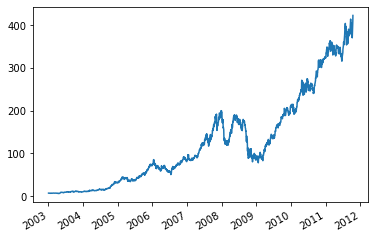

In [701]:
close_px.AAPL.plot() # 对该行进行plot

<AxesSubplot:>

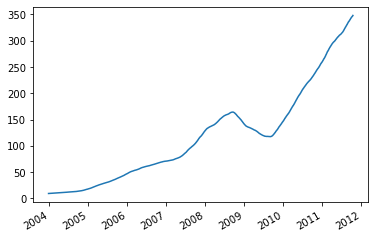

In [702]:
close_px.AAPL.rolling(250).mean().plot() # 图像更加平滑

<AxesSubplot:>

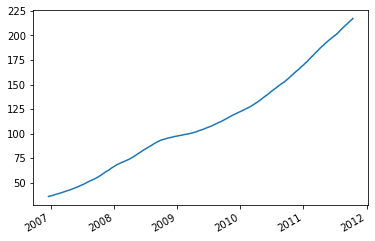

In [703]:
close_px.AAPL.rolling(1000).mean().plot() # 图像更加平滑

In [704]:
appl_std250 = close_px.AAPL.rolling(250, min_periods=10).std() # ???

In [705]:
appl_std250

2003-01-02          NaN
2003-01-03          NaN
2003-01-06          NaN
2003-01-07          NaN
2003-01-08          NaN
                ...    
2011-10-10    26.102069
2011-10-11    26.170785
2011-10-12    26.322769
2011-10-13    26.539215
2011-10-14    26.841851
Name: AAPL, Length: 2214, dtype: float64

<AxesSubplot:>

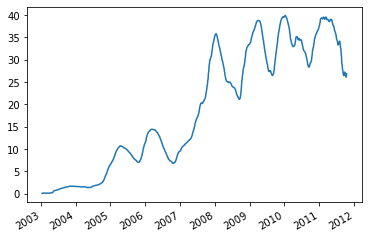

In [706]:
appl_std250.plot()

In [707]:
expanding_mean = appl_std250.expanding().mean()

In [708]:
expanding_mean

2003-01-02          NaN
2003-01-03          NaN
2003-01-06          NaN
2003-01-07          NaN
2003-01-08          NaN
                ...    
2011-10-10    18.862318
2011-10-11    18.865637
2011-10-12    18.869022
2011-10-13    18.872503
2011-10-14    18.876117
Name: AAPL, Length: 2214, dtype: float64

<AxesSubplot:>

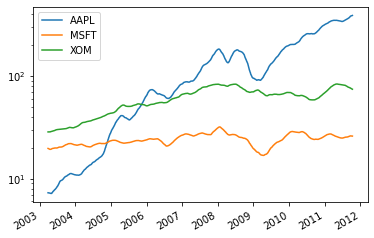

In [709]:
close_px.rolling(60).mean().plot(logy=True)

<AxesSubplot:>

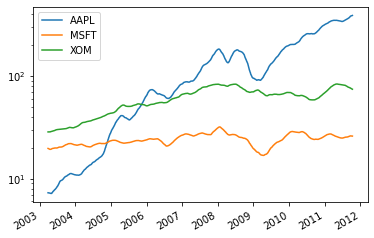

In [710]:
close_px.rolling(60).mean().plot(logy=True)

In [711]:
close_px

,AAPL,MSFT,XOM
2003-01-02,7.40,21.11,29.22
2003-01-03,7.45,21.14,29.24
2003-01-06,7.45,21.52,29.96
2003-01-07,7.43,21.93,28.95
2003-01-08,7.28,21.31,28.83
...,...,...,...
2011-10-10,388.81,26.94,76.28
2011-10-11,400.29,27.00,76.27
2011-10-12,402.19,26.96,77.16
2011-10-13,408.43,27.18,76.37


In [712]:
close_px.rolling('20D').count()[2000:] # ?? 

,AAPL,MSFT,XOM
2010-12-10,14.0,14.0,14.0
2010-12-13,13.0,13.0,13.0
2010-12-14,13.0,13.0,13.0
2010-12-15,14.0,14.0,14.0
2010-12-16,14.0,14.0,14.0
...,...,...,...
2011-10-10,14.0,14.0,14.0
2011-10-11,14.0,14.0,14.0
2011-10-12,14.0,14.0,14.0
2011-10-13,14.0,14.0,14.0


In [713]:
aapl_px = close_px.AAPL['2006':'2007'] # 对时间序列进行切片索引

In [714]:
aapl_px

2006-01-03     74.75
2006-01-04     74.97
2006-01-05     74.38
2006-01-06     76.30
2006-01-09     76.05
               ...  
2007-12-24    198.80
2007-12-26    198.95
2007-12-27    198.57
2007-12-28    199.83
2007-12-31    198.08
Name: AAPL, Length: 502, dtype: float64

In [715]:
ma60 = aapl_px.rolling(30, min_periods=20).mean()
ewma60 = aapl_px.ewm(span=30).mean()

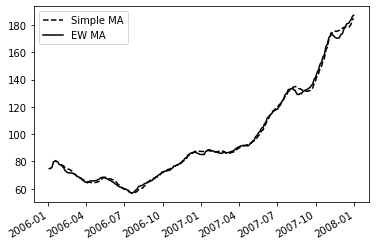

In [716]:
ma60.plot(style='k--', label='Simple MA')
ewma60.plot(style='k-', label='EW MA')
plt.legend(loc='upper left') # 显示图例

In [717]:
spx_px = close_px_all['SPX']

In [718]:
spx_px = spx_px.pct_change()

In [719]:
returns = close_px.pct_change()

In [720]:
returns

,AAPL,MSFT,XOM
2003-01-02,NaN,NaN,NaN
2003-01-03,0.006757,0.001421,0.000684
2003-01-06,0.000000,0.017975,0.024624
2003-01-07,-0.002685,0.019052,-0.033712
2003-01-08,-0.020188,-0.028272,-0.004145
...,...,...,...
2011-10-10,0.051406,0.026286,0.036977
2011-10-11,0.029526,0.002227,-0.000131
2011-10-12,0.004747,-0.001481,0.011669
2011-10-13,0.015515,0.008160,-0.010238


In [721]:
df = pd.DataFrame({
    'FR': [4.0405, 4.0963, 4.3149, 4.0963],
    'GR': [1.7246, 1.7482, 1.8519, 1.7482],
    'IT': [804.74, 810.01, 860.13, 810.01]},
    index=['1980-01-01', '1980-02-01', '1980-03-01', '1980-03-02'])

In [722]:
df.pct_change(2)

,FR,GR,IT
1980-01-01,NaN,NaN,NaN
1980-02-01,NaN,NaN,NaN
1980-03-01,0.067912,0.073814,0.06883
1980-03-02,0.000000,0.000000,0.00000


In [723]:
df

,FR,GR,IT
1980-01-01,4.0405,1.7246,804.74
1980-02-01,4.0963,1.7482,810.01
1980-03-01,4.3149,1.8519,860.13
1980-03-02,4.0963,1.7482,810.01


In [724]:
spx_px = close_px_all['SPX']

In [725]:
spx_px

2003-01-02     909.03
2003-01-03     908.59
2003-01-06     929.01
2003-01-07     922.93
2003-01-08     909.93
               ...   
2011-10-10    1194.89
2011-10-11    1195.54
2011-10-12    1207.25
2011-10-13    1203.66
2011-10-14    1224.58
Name: SPX, Length: 2214, dtype: float64

In [726]:
spx_rets = spx_px.pct_change()

In [727]:
spx_rets

2003-01-02         NaN
2003-01-03   -0.000484
2003-01-06    0.022474
2003-01-07   -0.006545
2003-01-08   -0.014086
                ...   
2011-10-10    0.034125
2011-10-11    0.000544
2011-10-12    0.009795
2011-10-13   -0.002974
2011-10-14    0.017380
Name: SPX, Length: 2214, dtype: float64

In [728]:
corr = returns.AAPL.rolling(125, min_periods=100).corr(spx_rets)

<AxesSubplot:>

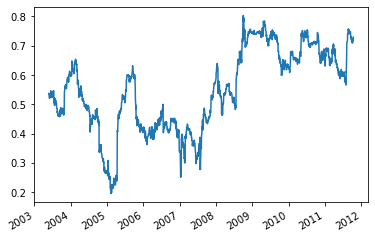

In [729]:
corr.plot()

In [730]:
corr = returns.rolling(125, min_periods=100).corr(spx_rets)

<AxesSubplot:>

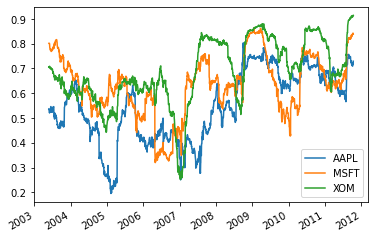

In [731]:
corr.plot()

In [732]:
from scipy.stats import percentileofscore

In [733]:
score_at_2percent = lambda x: percentileofscore(x, 0.02)

In [734]:
res = returns['AAPL'].rolling(250).apply(score_at_2percent) # 对划分的窗口数据进行操作

In [735]:
res

2003-01-02     NaN
2003-01-03     NaN
2003-01-06     NaN
2003-01-07     NaN
2003-01-08     NaN
              ... 
2011-10-10    92.0
2011-10-11    91.6
2011-10-12    92.0
2011-10-13    92.0
2011-10-14    91.6
Name: AAPL, Length: 2214, dtype: float64

<AxesSubplot:>

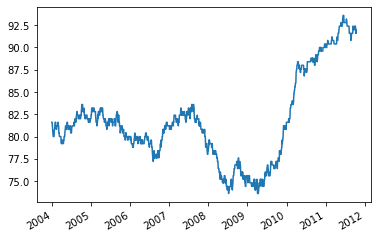

In [736]:
res.plot()

In [737]:
# 完结 一头雾水